<a href="https://colab.research.google.com/github/TrevorChess25/wine-data-clustering/blob/main/project1_wine_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Wine Quality Clustering with K-Means

Names: Trevor Chessnoe, Miguel LLanes, Olivia Schafer <br>
Date completed: 11-11-2024 <br>
Project 1: Group 6 <br>
Dataset: https://archive.ics.uci.edu/dataset/186/wine+quality

## Import and Select Data

In [ ]:
import pandas as pd
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

data = pd.concat([red_wine, white_wine], axis=0)
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Understanding the data

In [ ]:
print("Red wine shape:", red_wine.shape)
print("White wine shape:", white_wine.shape)
print("Red & White shape:", data.shape)

features = data.columns.to_list()
print("Data features: ", features)

data_means = pd.DataFrame(data.mean())
data_ranges = pd.DataFrame(data.max()-data.min())
data_prop = pd.concat([data_means, data_ranges], axis=1)

data_prop.columns = ['Means','Ranges']
print(data_prop)

Red wine shape: (1599, 12)
White wine shape: (4898, 12)
Red & White shape: (6497, 12)
Data features:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
                           Means     Ranges
fixed acidity           7.215307   12.10000
volatile acidity        0.339666    1.50000
citric acid             0.318633    1.66000
residual sugar          5.443235   65.20000
chlorides               0.056034    0.60200
free sulfur dioxide    30.525319  288.00000
total sulfur dioxide  115.744574  434.00000
density                 0.994697    0.05187
pH                      3.218501    1.29000
sulphates               0.531268    1.78000
alcohol                10.491801    6.90000
quality                 5.818378    6.00000


##Preprocessing: Normalizing value ranges for features. Dimensionality reduction

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop quality scores so natural groupings can be found w clustering
data = data.drop('quality', axis=1)

# Normalize value ranges for features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Project 11-D wine data to 2-D space for graphing
pca = PCA(n_components=2)
proj_data = pca.fit_transform(data_scaled)

print(pd.DataFrame(proj_data).head(5))

# Explained variance represents the amount of original data's variance maintained after PCA
# High percentages mean the projected data captures most of the variance
print("Explained Variance: ", pca.explained_variance_ratio_)

          0         1
0 -3.205996  0.416523
1 -3.039051  1.107462
2 -3.071893  0.878964
3 -1.571262  2.112545
4 -3.205996  0.416523
Explained Variance:  [0.2754426  0.22671146]


##Determining optimal number of clusters using the elbow method

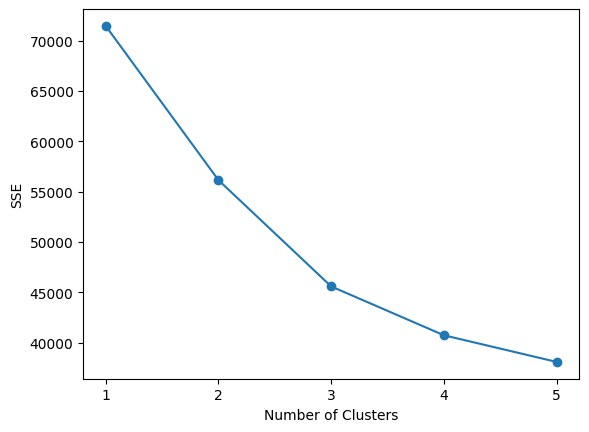

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans

SSE = []
for k in range(1, 6):
    k_means = KMeans(n_clusters = k)
    k_means.fit(data_scaled)
    SSE.append(k_means.inertia_)

plt.plot(range(1, 6), SSE, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

#Format x axis to hide decimal values
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

##Calculating SSE for k = 2 and k = 3

In [ ]:
#SSE when k = 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_scaled)
sse = kmeans.inertia_
print("SSE when k = 2: ",sse)

#SSE when k = 2
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_scaled)
sse = kmeans.inertia_
print("SSE when k = 3: ",sse)

SSE when k = 2:  58409.1631716496
SSE when k = 3:  45577.033262563615


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3 Clusters
kmeans = KMeans(n_clusters=3)
# Calculate centroid positions and assign clusters
kmeans.fit(proj_data)
# Get cluster assignment labels
cluster_labels = kmeans.labels_

#Calculate silhouette score for 3 clusters
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print("Average silhouette score:", silhouette_avg)

Average silhouette score: 0.23111836181273995


## Fit wine data to Kmeans model (k=3)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3 Clusters
kmeans = KMeans(n_clusters=3)
# Calculate centroid positions and assign clusters
kmeans.fit(proj_data)
# Get cluster assignment labels
cluster_labels = kmeans.labels_

#Calculate silhouette score for 3 clusters
silhouette_avg = silhouette_score(proj_data, cluster_labels)
print("Average silhouette score:", silhouette_avg)

Average silhouette score: 0.49297858835651975


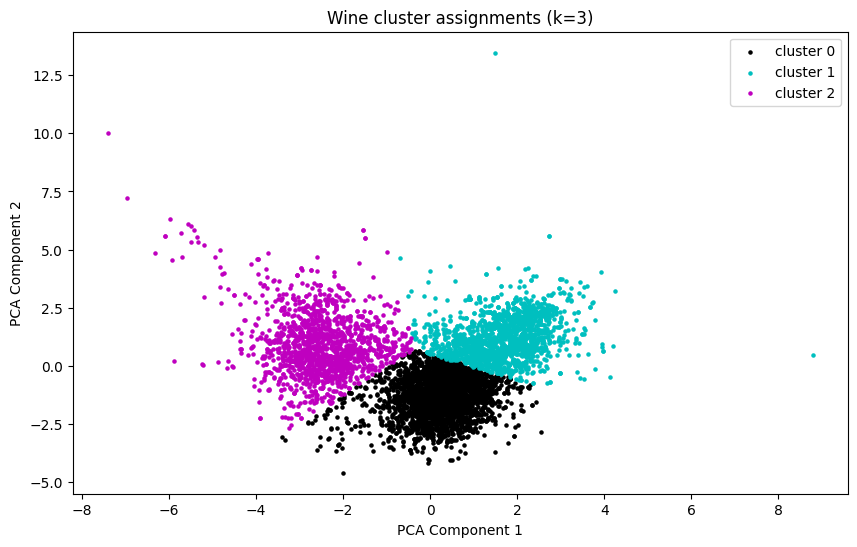

In [ ]:
import matplotlib.pyplot as plt
# Assign 2D projections of data to X and y
X = proj_data[:,0]
y = proj_data[:,1]

# Plot cluster assignments for wine dataset
plt.figure(figsize=(10, 6))
plt.title("Wine cluster assignments (k=3)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
point_size = 5

plt.scatter(X[cluster_labels == 0], y[cluster_labels == 0], color='k', s=point_size, label='cluster 0')
plt.scatter(X[cluster_labels == 1], y[cluster_labels == 1], color='c', s=point_size, label='cluster 1')
plt.scatter(X[cluster_labels == 2], y[cluster_labels == 2], color='m', s=point_size, label='cluster 2')
plt.legend()
plt.show()

## Fit wine data to Kmeans model (k=2)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3 Clusters
kmeans = KMeans(n_clusters=2)
# Calculate centroid positions and assign clusters
kmeans.fit(proj_data)
# Get cluster assignment labels
cluster_labels = kmeans.labels_

#Calculate silhouette score for 3 clusters
silhouette_avg = silhouette_score(proj_data, cluster_labels)
print("Average silhouette score:", silhouette_avg)

Average silhouette score: 0.34851151943601727


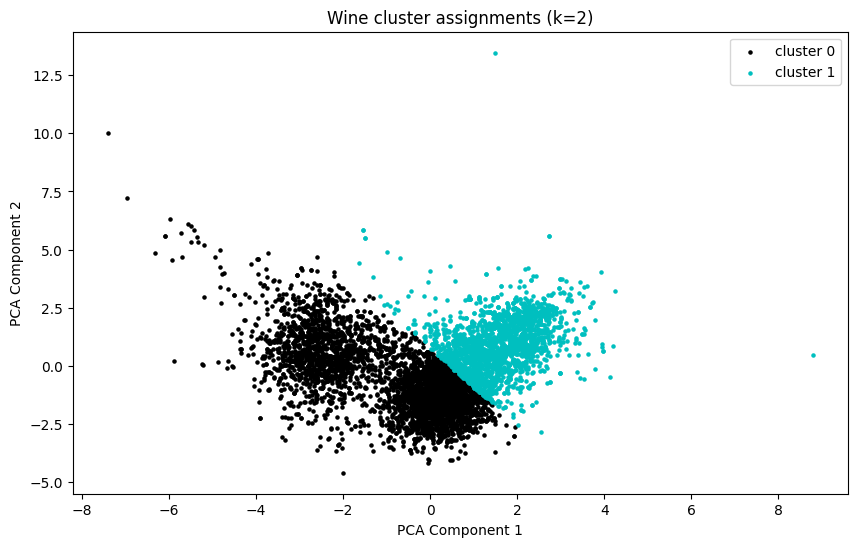

In [ ]:
import matplotlib.pyplot as plt
# Assign 2D projections of data to X and y
X = proj_data[:,0]
y = proj_data[:,1]

# Plot cluster assignments for wine dataset
plt.figure(figsize=(10, 6))
plt.title("Wine cluster assignments (k=2)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
point_size = 5

plt.scatter(X[cluster_labels == 0], y[cluster_labels == 0], color='k', s=point_size, label='cluster 0')
plt.scatter(X[cluster_labels == 1], y[cluster_labels == 1], color='c', s=point_size, label='cluster 1')
plt.legend()
plt.show()